In [ ]:
# Imports from utils/imports.py
from utils.imports import pd, plt, WordCloud

#Exploratory Data Analysis (including data description)

In [ ]:
df.shape

(206636, 5)

In [ ]:
df.head(5)

,Sentence,SQLInjection,XSS,CommandInjection,Normal
0,""" or pg_sleep ( __TIME__ ) --",1.0,0.0,0.0,0.0
1,create user name identified by pass123 tempora...,1.0,0.0,0.0,0.0
2,%29,1.0,0.0,0.0,0.0
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1.0,0.0,0.0,0.0
4,select * from users where id = '1' or @ @1 = ...,1.0,0.0,0.0,0.0


In [ ]:
# Sentence feature is renamed to show it represents Payloads
df.rename(columns={'Sentence': 'Payload'}, inplace=True)

In [ ]:
df.tail(5)

,Payload,SQLInjection,XSS,CommandInjection,Normal
206631,"I am not a parent, neither am I a male. But I ...",0.0,0.0,1.0,0.0
206632,This shorter movie is the epitome the expected...,0.0,0.0,1.0,0.0
206633,Dead Gentlemen Productions has put together a ...,0.0,0.0,1.0,0.0
206634,This movie caught me by surprise. For years I ...,0.0,0.0,1.0,0.0
206635,There are many illnesses born in the mind of m...,0.0,0.0,1.0,0.0


In [ ]:
# Numerical description of the dataset
df.describe()

,SQLInjection,XSS,CommandInjection,Normal
count,206636.000000,206636.000000,206636.000000,206636.000000
mean,0.277377,0.197444,0.241971,0.283208
std,0.447705,0.398071,0.428278,0.450558
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

,0
Payload,object
SQLInjection,float64
XSS,float64
CommandInjection,float64
Normal,float64


In [ ]:
#pd.set_option('display.width', 1000)

In [ ]:
# Checking for missing values
df.isna().sum()

,0
Payload,0
SQLInjection,0
XSS,0
CommandInjection,0
Normal,0


In [ ]:
# Get the number of unique values in each column
df.nunique()

,0
Payload,199797
SQLInjection,2
XSS,2
CommandInjection,2
Normal,2


In [ ]:
# Taking a sample size of 10500 rows to improve the processing speed, data management and performance of computational power
df1 = df.sample(n=10500, random_state=42)

In [ ]:
# Dropping the 'CommandInjection' column since it is not to be used in this modelling as well as it's true values in the Paylod column so no
# row will be 0 0 0 for the Payloads that should have been 1.
# Identify rows to drop where CommandInjection has a value of 1
rows_to_drop = df1['CommandInjection'] == 1

# Drop the rows and the column
df1 = df1[~rows_to_drop].drop(columns=['CommandInjection'])

# Display the updated DataFrame
print(df1.head())


                                                  Payload  SQLInjection  XSS  \
131530   term=Estepona"><script>alert("BlueMax")</script>           0.0  1.0   
79892   The Gun is probably the worst film I've ever s...           0.0  0.0   
25278   tttttttttttttttttttttttttttttttttttttttttttttt...           1.0  0.0   
22610                                                 ...           1.0  0.0   
68971   > What a dud. It began with some promise, then...           0.0  0.0   

        Normal  
131530     0.0  
79892      1.0  
25278      0.0  
22610      0.0  
68971      1.0  


In [ ]:
df1.head(3)

,Payload,SQLInjection,XSS,Normal
131530,"term=Estepona""><script>alert(""BlueMax"")</script>",0.0,1.0,0.0
79892,The Gun is probably the worst film I've ever s...,0.0,0.0,1.0
25278,tttttttttttttttttttttttttttttttttttttttttttttt...,1.0,0.0,0.0


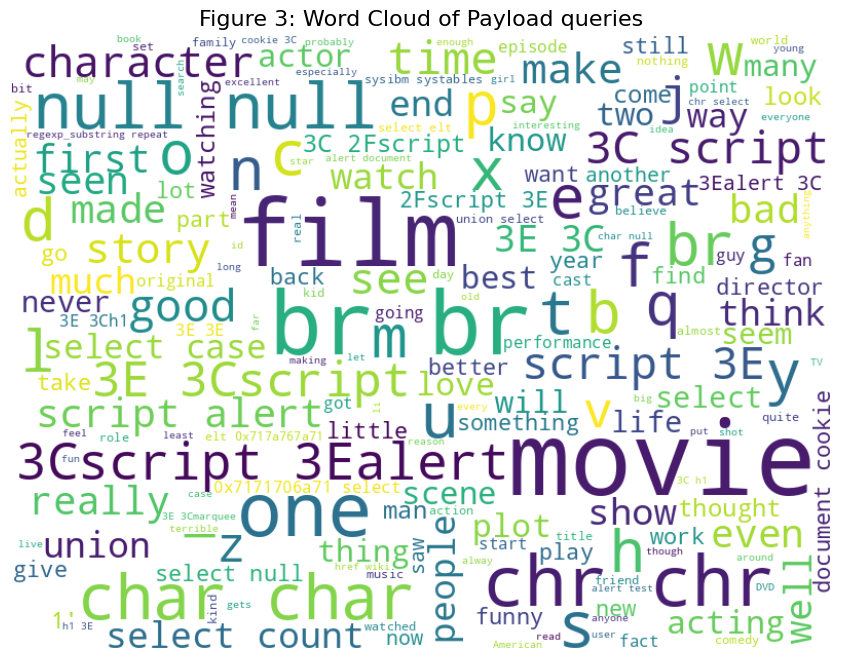

In [ ]:
# Join the words from the 'Payload' column into a single string
words = ' '.join(df1['Payload'].dropna().unique())  # Remove duplicates

# Generate the word cloud with custom size
wordcloud = WordCloud(
    background_color='white',  # White background
    width=800,                # Width of the word cloud
    height=600,                # Height of the word cloud
    max_font_size=100,         # Maximum font size for the largest word
    min_font_size=10,           # Minimum font size for the smallest word (optional)
    max_words=200,             # Limit number of words
    relative_scaling=0.5       # Focus on word frequency
).generate(words)

# Display the word cloud
plt.figure(figsize=(12, 8))   # Set the size of the figure
plt.imshow(wordcloud, interpolation='bilinear') # Reduce interpolation overhead
plt.title('Figure 3: Word Cloud of Payload queries', fontsize=16)  # Title font size
plt.axis('off')  # Turn off axis
plt.show()


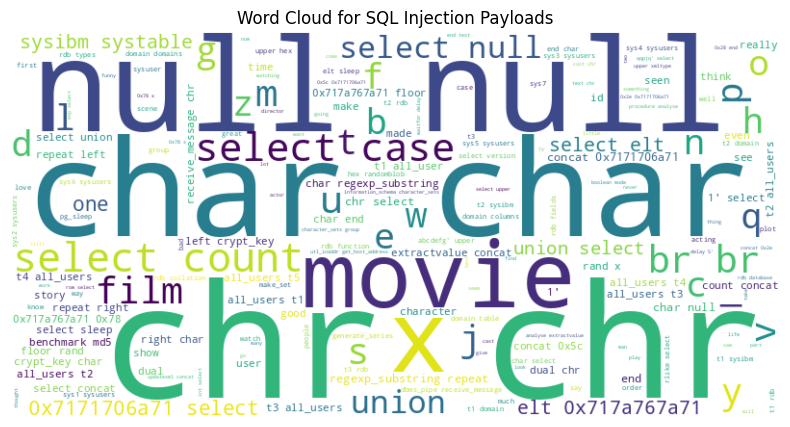

In [ ]:
# Filter out only the SQLi payloads (where SQLi == 1)
sqli_payloads = df[df['SQLInjection'] == 1]['Payload']

# Join all SQLi payloads into a single string for the word cloud
sqli_text = " ".join(sqli_payloads)

# Word cloud for the SQLi payloads.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sqli_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for SQL Injection Payloads")
plt.show()


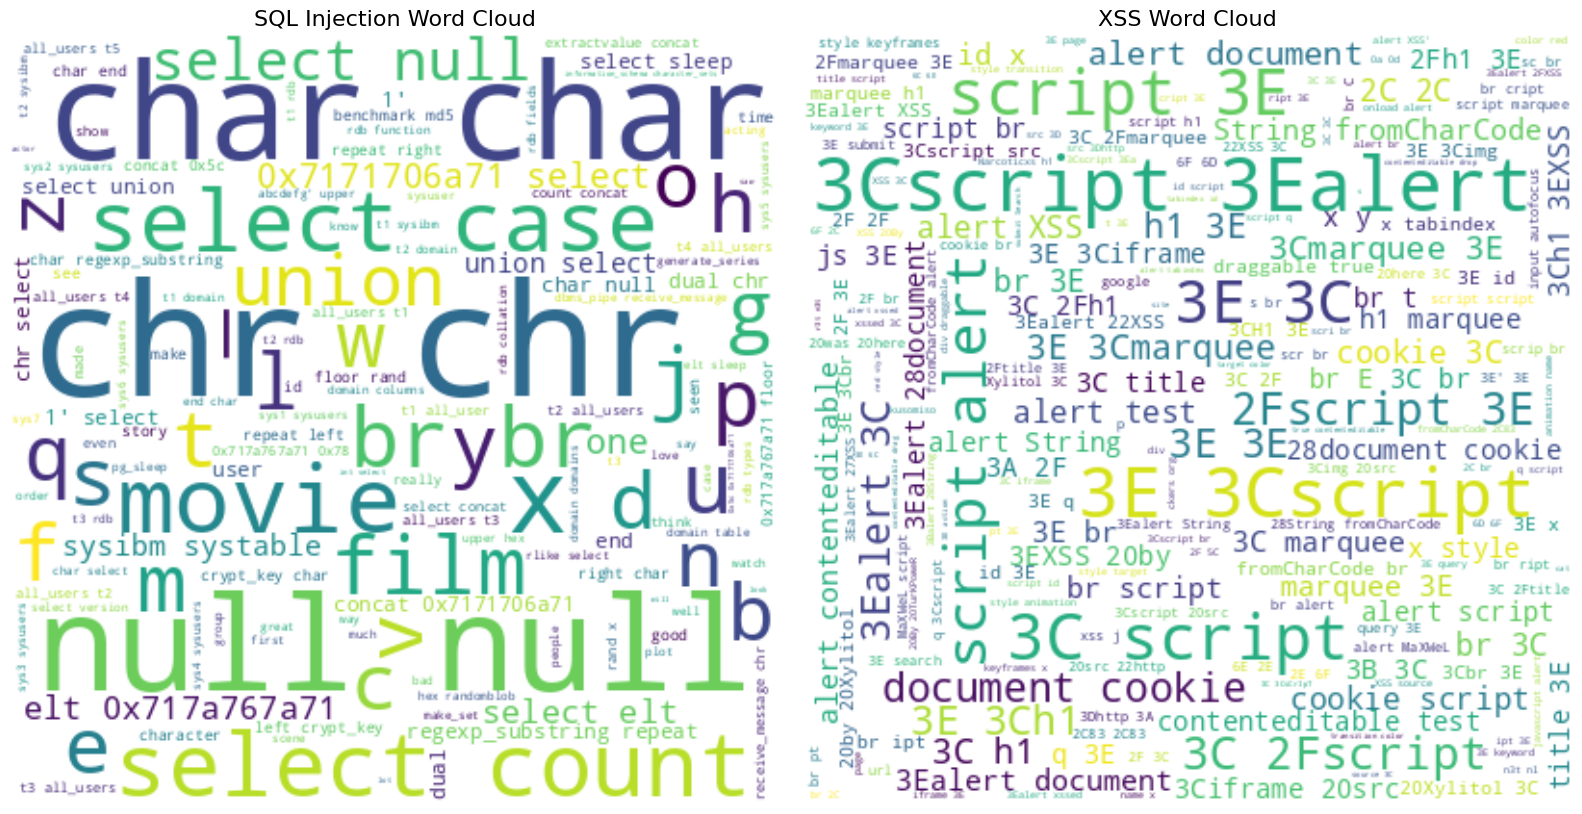

In [ ]:
# Filter payloads for SQLi and XSS
sqli_payloads = " ".join(df[df['SQLInjection'] == 1]['Payload'])
xss_payloads = " ".join(df[df['XSS'] == 1]['Payload'])

# Generate word clouds
sqli_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(sqli_payloads)
xss_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(xss_payloads)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# SQLi Word Cloud
axes[0].imshow(sqli_wordcloud, interpolation='bilinear')
axes[0].set_title("SQL Injection Word Cloud", fontsize=16)
axes[0].axis('off')

# XSS Word Cloud
axes[1].imshow(xss_wordcloud, interpolation='bilinear')
axes[1].set_title("XSS Word Cloud", fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()


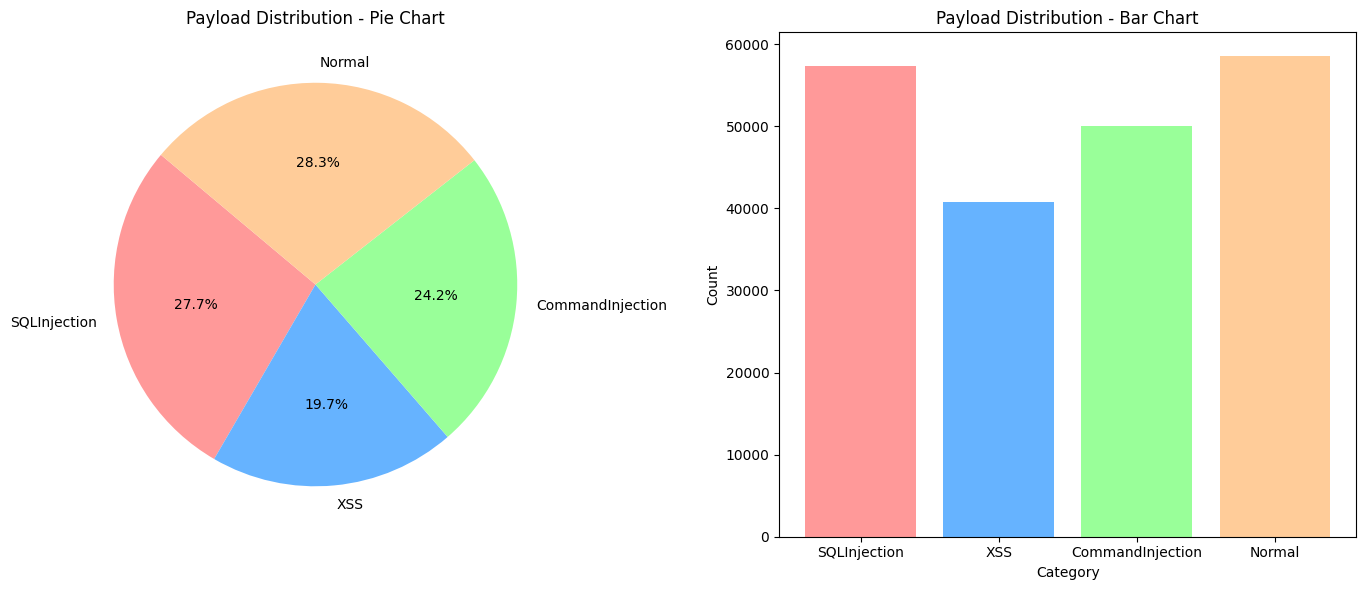

In [ ]:
# Count the occurrences of each category
category_counts = df[['SQLInjection', 'XSS', 'CommandInjection', 'Normal']].sum()

# Prepare data for plotting
categories = category_counts.index
counts = category_counts.values

# Plot Pie Chart
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Payload Distribution - Pie Chart')

# Plot Bar Chart
plt.subplot(1, 2, 2)
plt.bar(categories, counts, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Payload Distribution - Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
